In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import warnings
warnings.simplefilter("ignore")


In [6]:
df=pd.read_csv("train.csv")

df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
df.drop(columns=['Unnamed: 0','Booking_ID'],inplace=True)

In [6]:
df.shape

(29020, 18)

In [9]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
for col in df.columns:
    print(f"{col} : {df[col].value_counts()}")

no_of_adults : no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64
no_of_children : no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64
no_of_weekend_nights : no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64
no_of_week_nights : no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64
type_of_meal_plan : type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64
required_car_parking_space : required_car_parking_space
0    20452
1      907
Name: count, dtype: int64
room_type_reserved : room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758


In [13]:
cat_cols=['type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved',
        'market_segment_type',
       'repeated_guest', 'booking_status']

In [14]:
num_cols=['no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests']

## Data Analysis

In [15]:
data=df.copy()

In [16]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


### UNIVARIATE ANALYSIS

In [27]:
def num_plot(df,num_cols):
    fig,axes=plt.subplots(len(num_cols),2,figsize=(15,len(num_cols)*5))
    if len(num_cols)==1:
        axes=[axes]
    for i,column in enumerate(num_cols):
        sns.histplot(data=df,x=column,ax=axes[i][0],kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df,x=column,ax=axes[i][1],palette="Blues")
        axes[i][1].set_title(f"Boxplot for {column}")
    
    plt.tight_layout()
    plt.show()



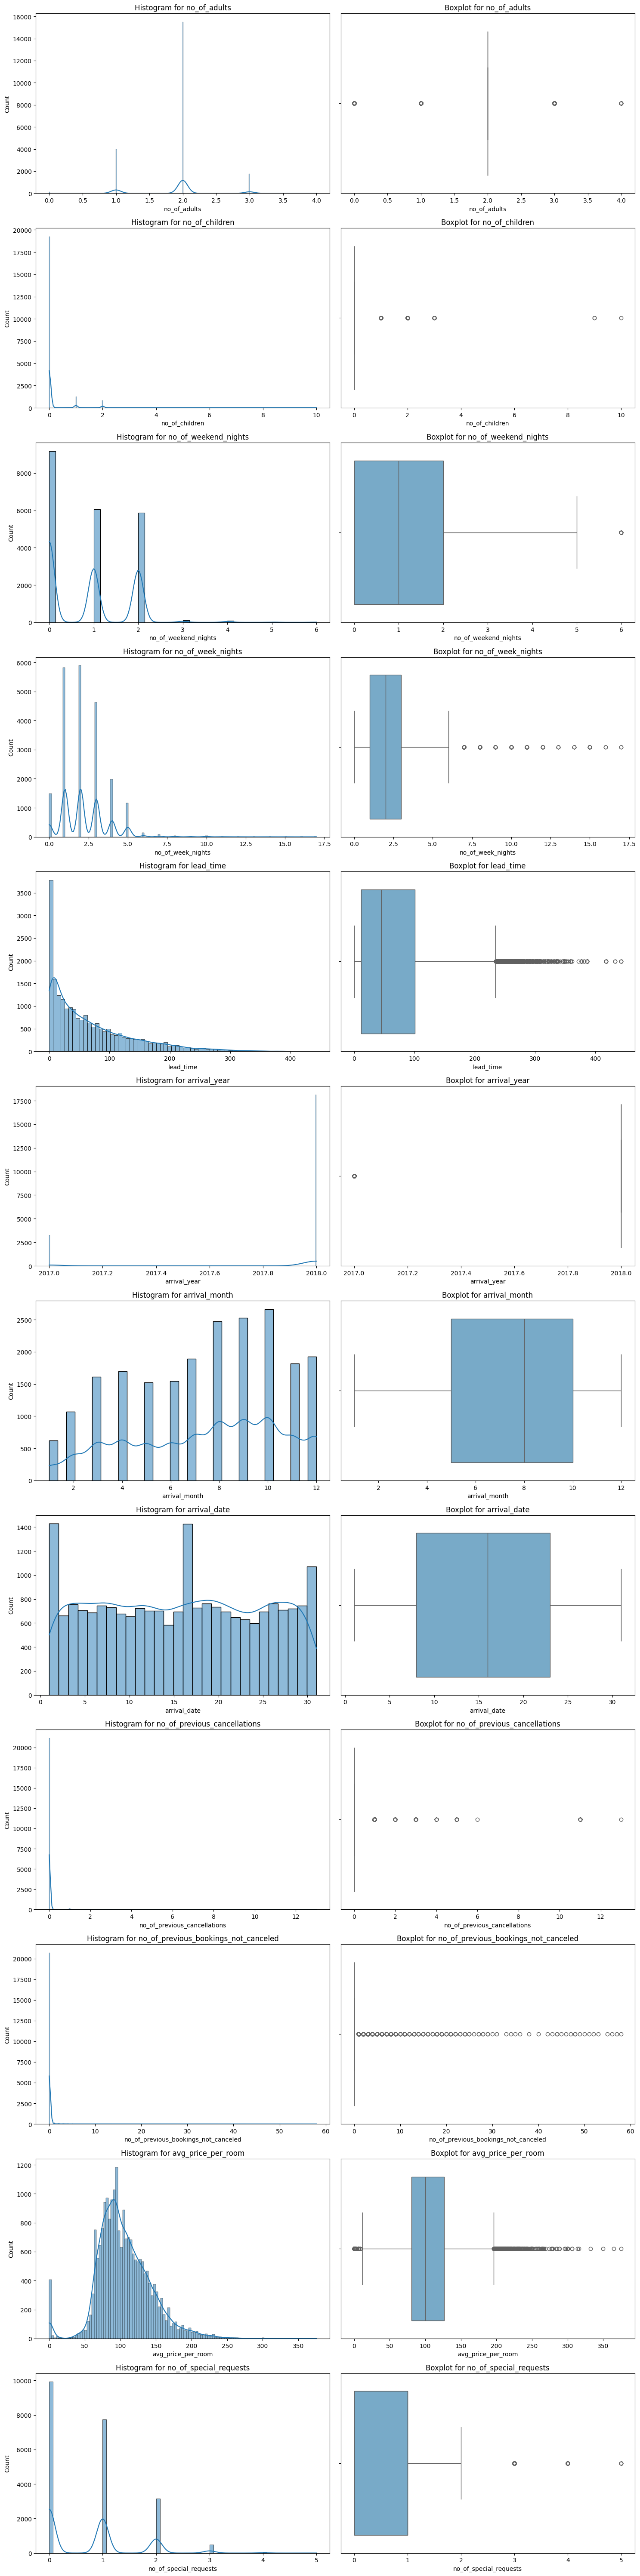

In [28]:
num_plot(data,num_cols)

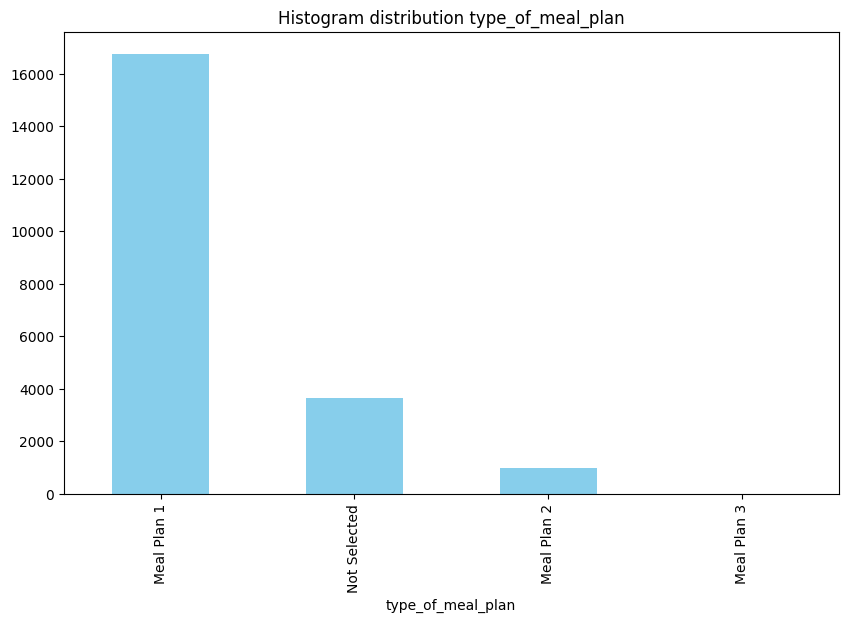

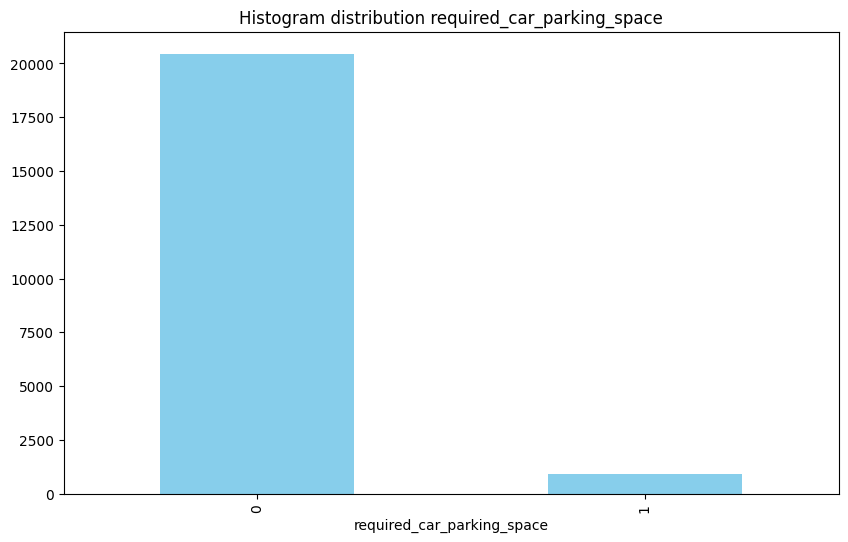

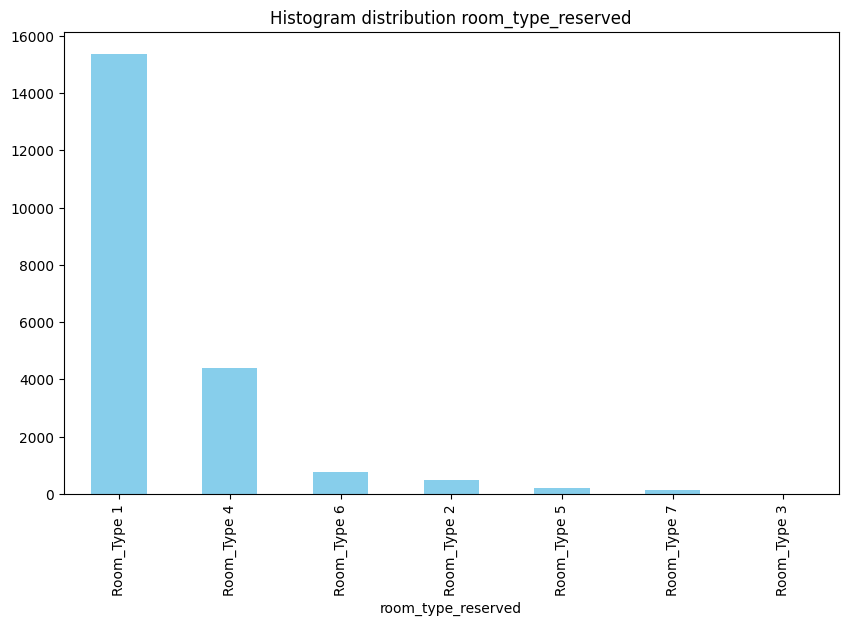

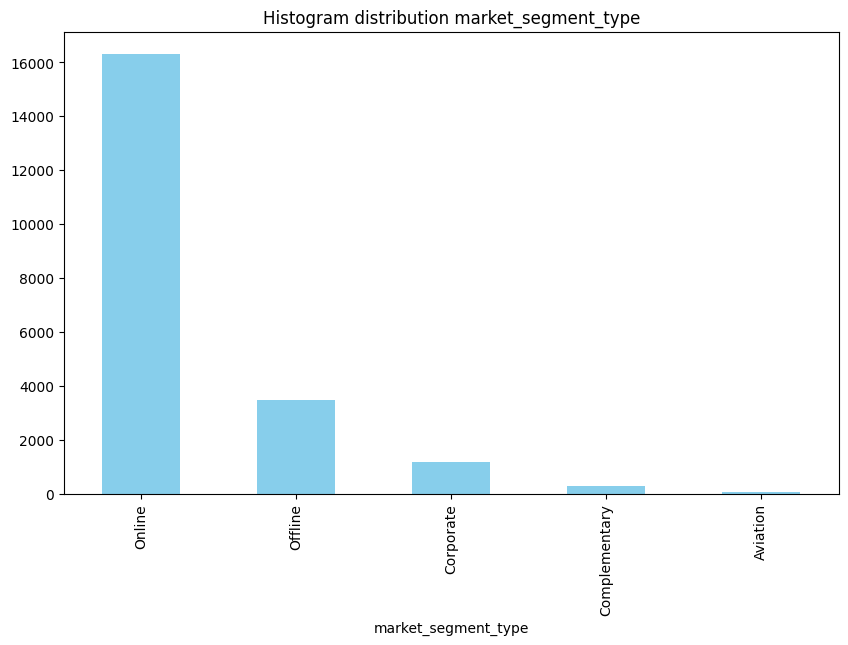

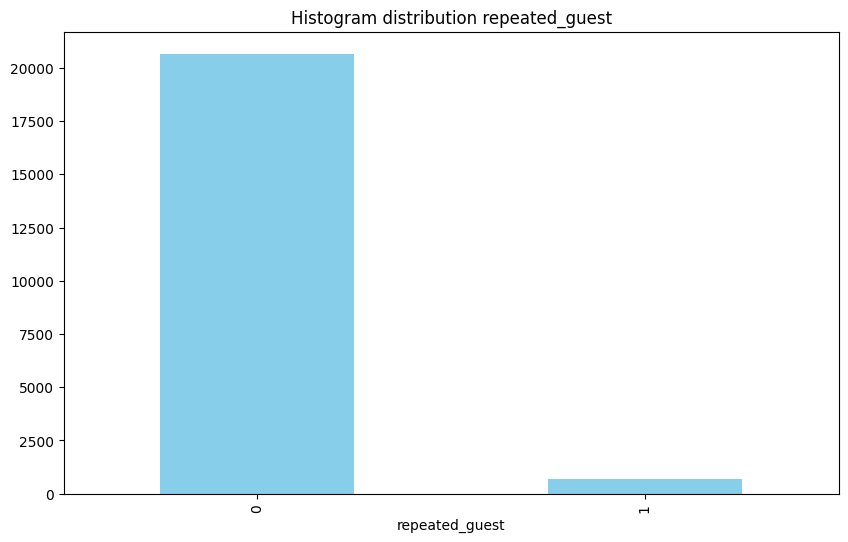

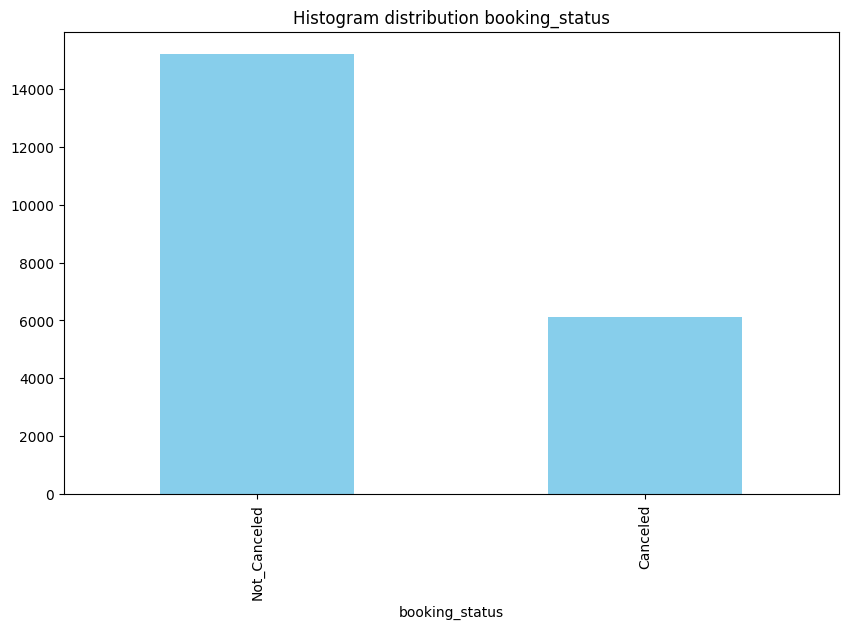

In [26]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar',color='Skyblue')
    plt.title(f"Histogram distribution {cat_feature}")

In [52]:
def plt_bivariate_analysis(df,target,num_features):
    num_plots= len(num_features)
    num_rows=(num_plots +1) //2 

    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten()

    for i,column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i],data=df,palette='Blues')
        axes[i].set_title(f"{column} vs {target}")

        plt.tight_layout()
        
        plt.show

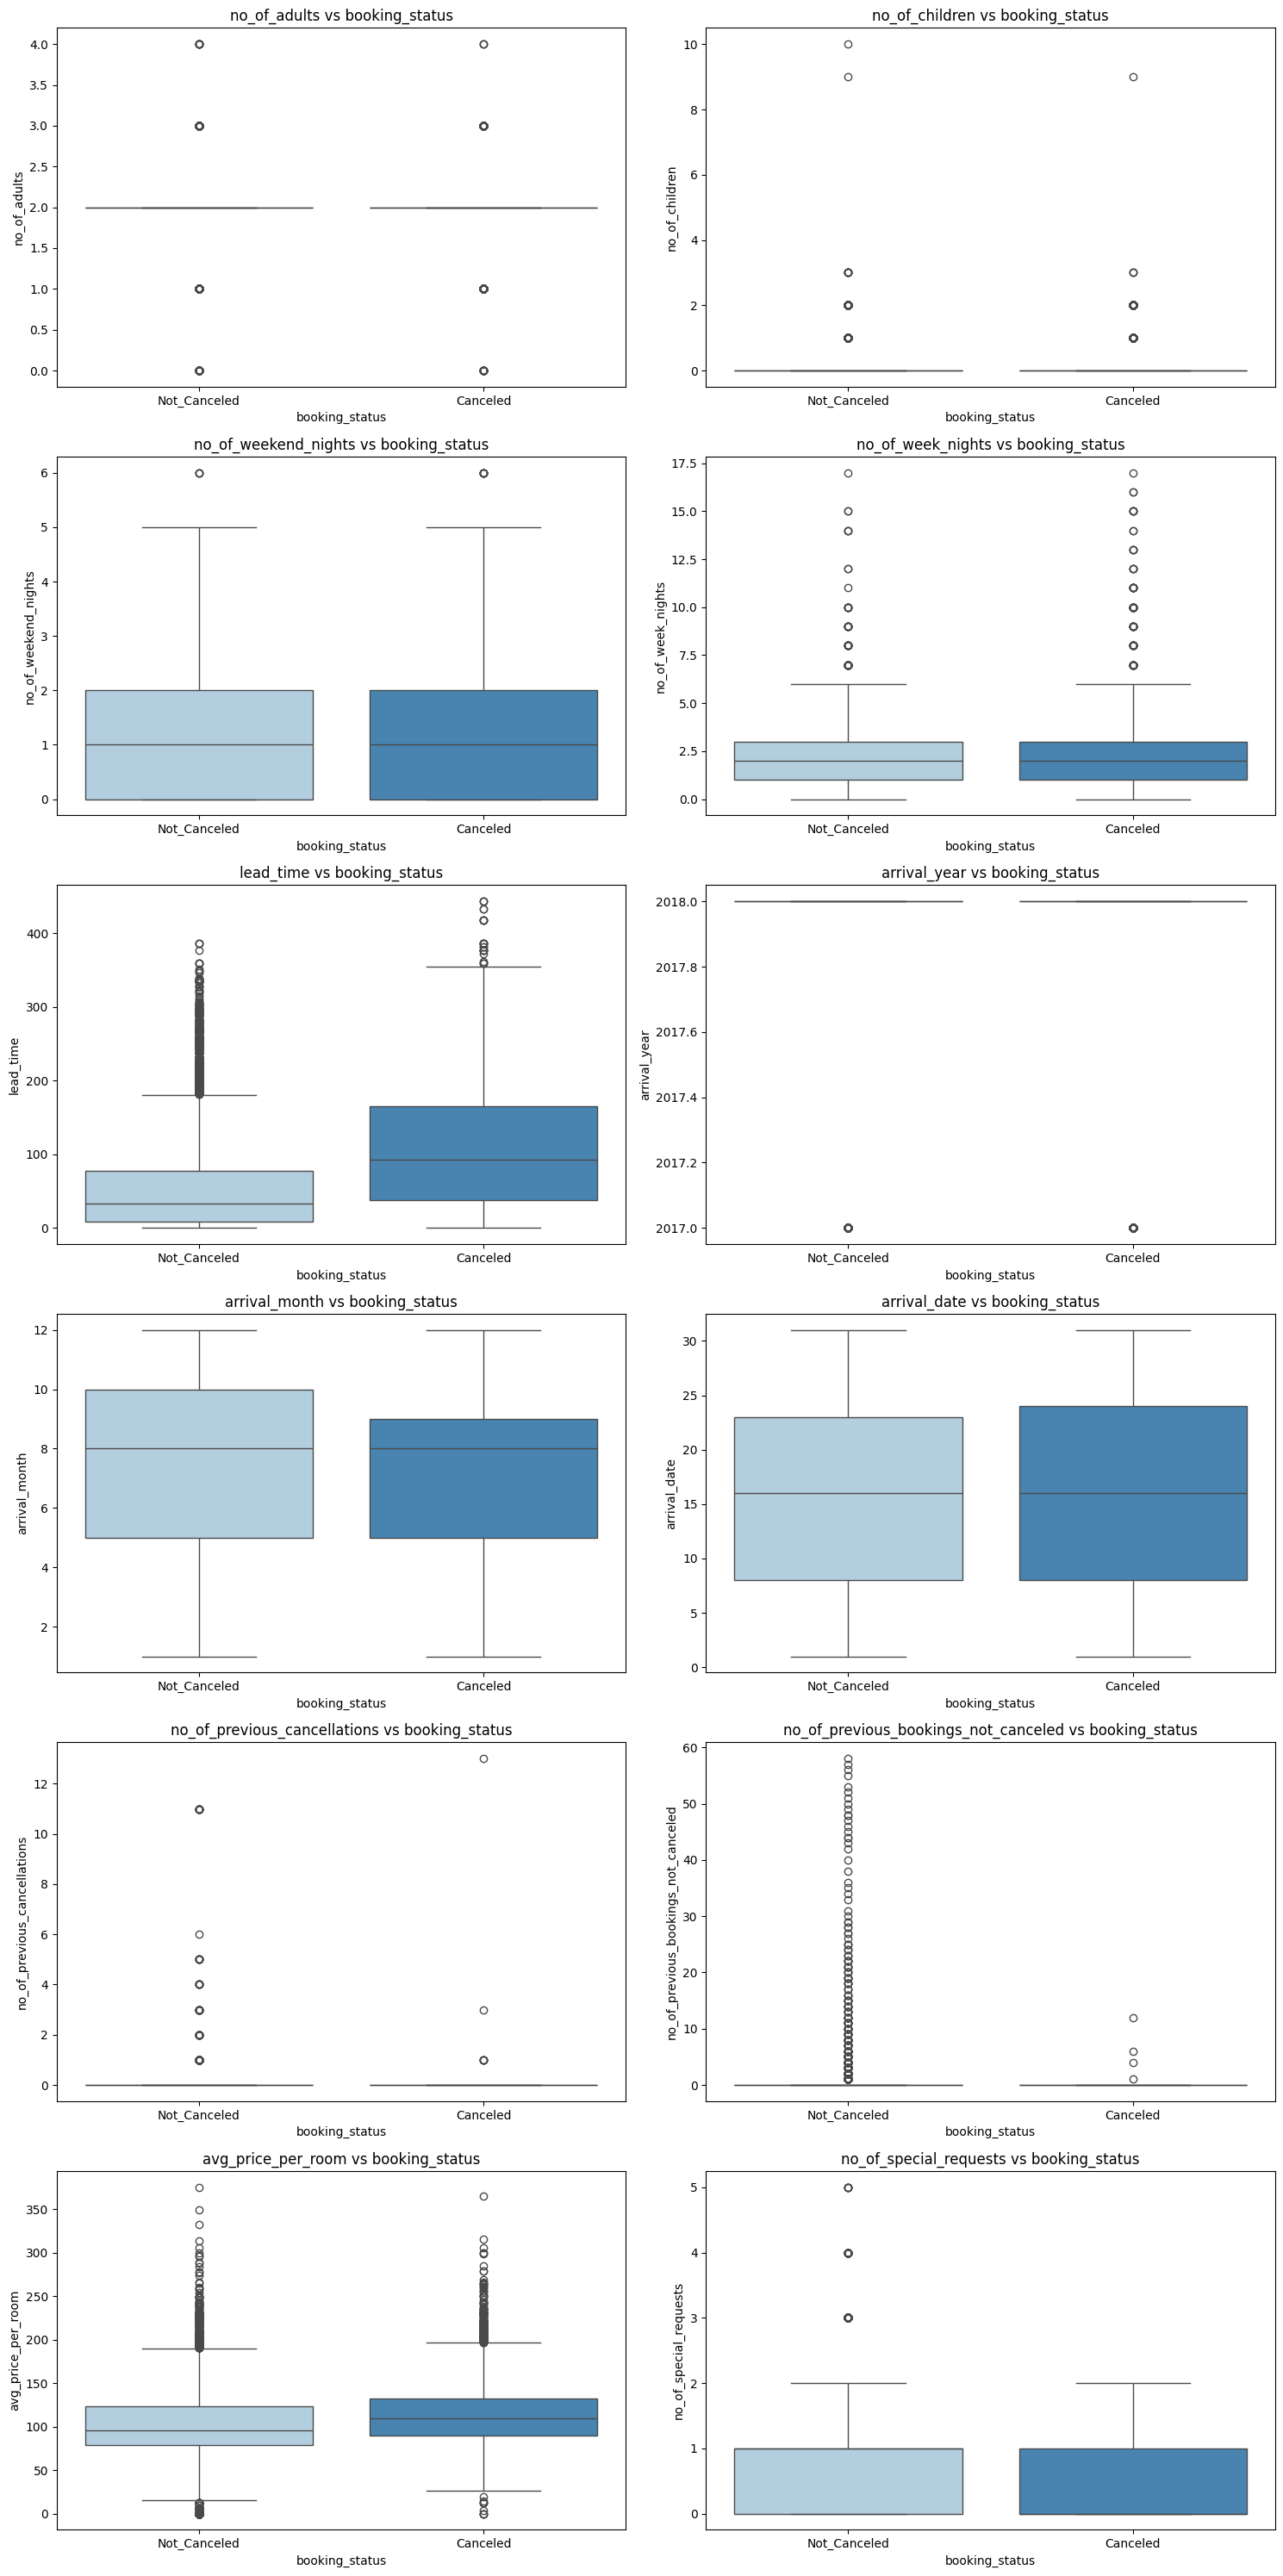

In [53]:
plt_bivariate_analysis(data,"booking_status",num_cols)

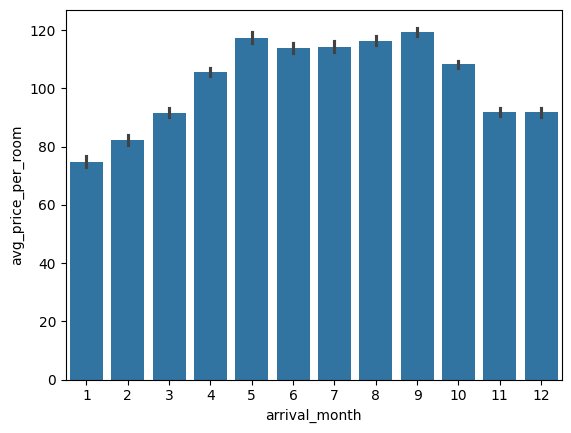

In [54]:
sns.barplot(x='arrival_month',y='avg_price_per_room',data=data)
plt.show()

In [55]:
def plot_bivariate_catgorical(df,target,cat_feature):
    num_features=len(cat_feature)
    num_rows=(num_features +1) //2
    
    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten()

    for i,column in enumerate(cat_feature):
        sns.countplot(x=column,hue=target,data=df,palette="Set2",ax=axes[i])
        axes[i].set_title(f"{column} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)
        
    plt.tight_layout()
    plt.show()

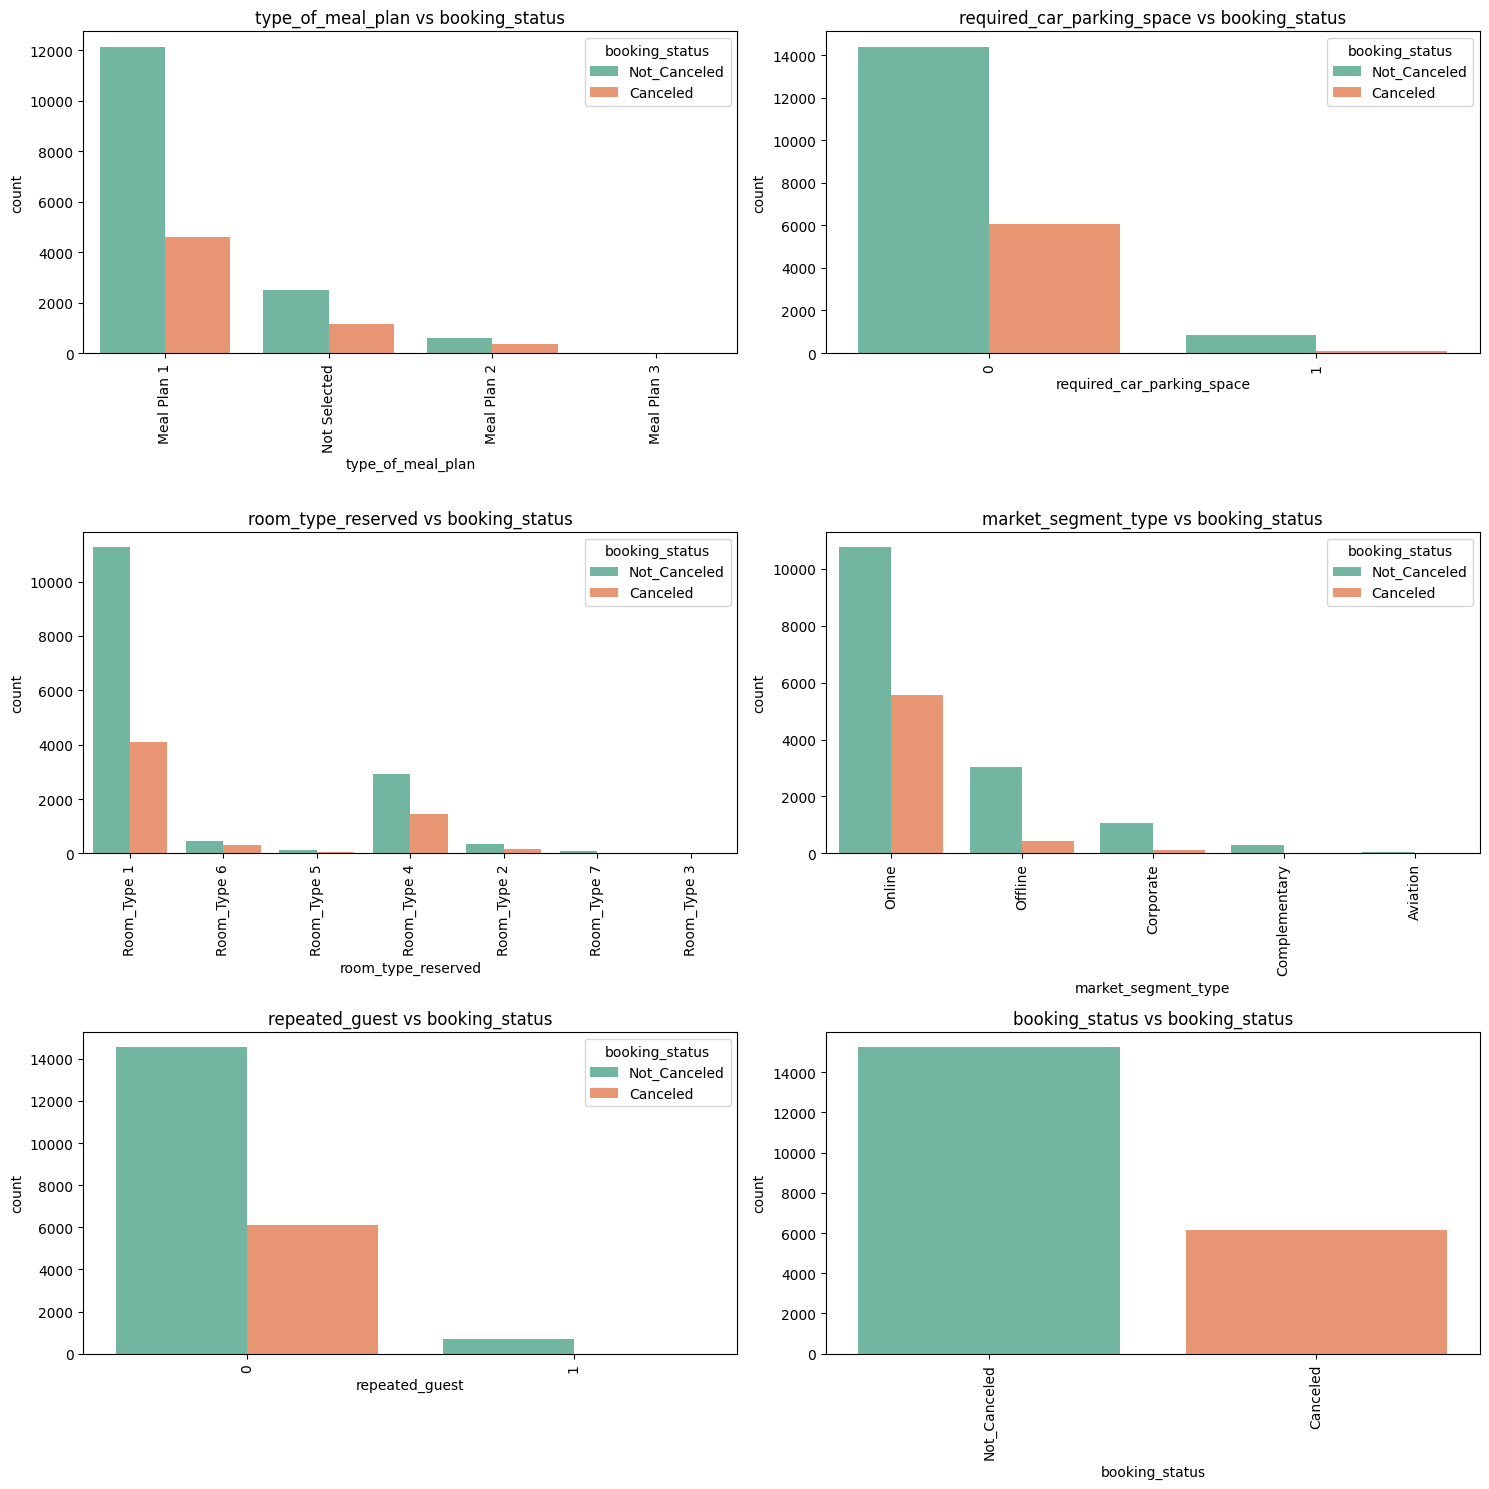

In [56]:
plot_bivariate_catgorical(data,"booking_status",cat_cols)

### Label Encodeing

In [57]:
from sklearn.preprocessing import LabelEncoder

Label_encoder= LabelEncoder()

mapping={}

for col in cat_cols:
    df[col]=Label_encoder.fit_transform(df[col])
    mapping[col]={label:code for label,code in zip(Label_encoder.classes_,Label_encoder.transform(Label_encoder.classes_))}
    

In [58]:
mapping


{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

## Multicolinearity

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

In [60]:
X= sm.add_constant(df)

vit_data=pd.DataFrame()

vit_data['feature']= X.columns
vit_data['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [61]:
vit_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [62]:
corr= df.corr()

In [63]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

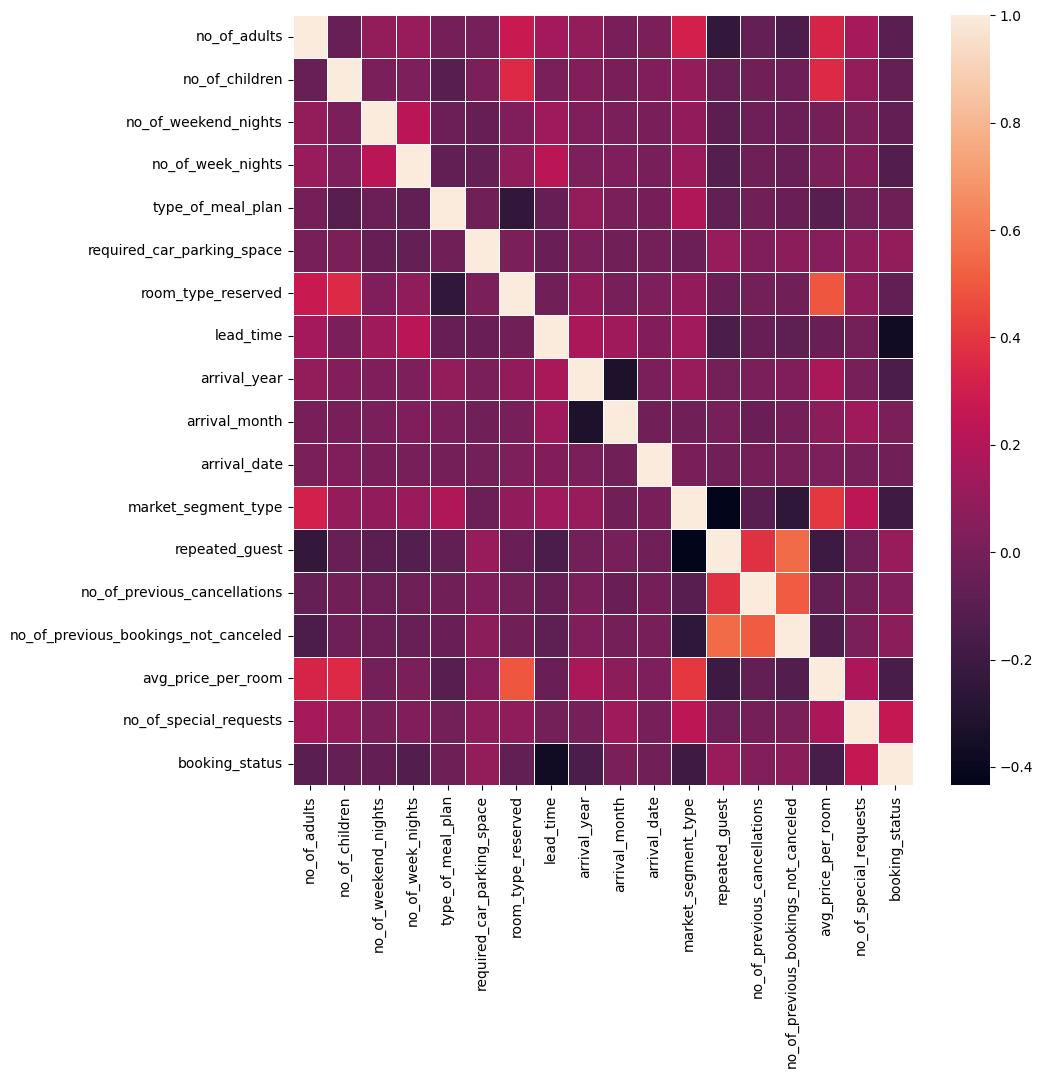

In [64]:
plt.figure(figsize=(10,10))

sns.heatmap(corr,linewidths=0.5)

In [65]:
skewness=df.skew()

In [66]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [67]:
for col in df.columns:
    if skewness[col]>5:
        df[col]=np.log1p(df[col])

## Imbalance Data

In [69]:
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [85]:
x=df.drop(columns='booking_status')
y=df['booking_status']

In [86]:
x.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [87]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [89]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)

x_res,y_res=smote.fit_resample(x,y)

In [90]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [91]:
balanced_df=pd.DataFrame(x_res,columns=x.columns)
balanced_df["booking_status"] =y_res

In [93]:

df=balanced_df.copy()

### Feature Selection

In [96]:
len(df.columns)

18

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
X=df.drop(columns='booking_status')
y=df['booking_status']

In [100]:
model =RandomForestClassifier(random_state=42)

model.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [102]:
Feature_importance=model.feature_importances_

In [ ]:
feature_importance= pd.DataFrame({
    'feature':X.columns,
    'importance': Feature_importance
})

In [183]:
top_importance_feature=feature_importance.sort_values(by="importance",ascending=False)

In [184]:
top_importance_feature

,feature,importance
7,lead_time,0.261824
16,no_of_special_requests,0.182032
15,avg_price_per_room,0.150638
9,arrival_month,0.086209
10,arrival_date,0.084072
11,market_segment_type,0.058509
3,no_of_week_nights,0.043996
2,no_of_weekend_nights,0.029981
4,type_of_meal_plan,0.020269
6,room_type_reserved,0.019697


In [185]:
top_10_feature=top_importance_feature["feature"].head(10).values

In [187]:
top_10_df=df[top_10_feature.tolist() + ['booking_status']]

### Model Selection

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [191]:
X=top_10_df.drop(columns='booking_status')
y=top_10_df['booking_status']

In [192]:
X_train , X_test ,y_train , y_test =train_test_split(X,y ,test_size=0.2,random_state= 42)

In [193]:
classifiers = {
    "Random Forest" : RandomForestClassifier (random_state=42),
    "LogisticRegression":LogisticRegression (random_state=42),
    "GradientBoostingClassifier":GradientBoostingClassifier (random_state=42),
    "DecisionTreeClassifier":DecisionTreeClassifier (random_state=42),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "XGB":XGBClassifier(random_state=42),
    "ADB":AdaBoostClassifier (random_state=42),
    "LGBM":LGBMClassifier(random_state=42)

}

In [194]:
metrics= {
    "Model" :[],
    "Accuracy":[],
    "precision":[],
    "Recall":[],
    "F1 score":[]
}

In [195]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred=classifier.predict(X_test)

    accuracy= accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score (y_test,y_pred)
    f1=f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 score"].append(f1)

In [196]:
metrics_df=pd.DataFrame(metrics)

In [197]:
metrics_df

,Model,Accuracy,precision,Recall,F1 score
0,Random Forest,0.891351,0.893721,0.890228,0.891971
1,LogisticRegression,0.786640,0.804752,0.761238,0.782390
2,GradientBoostingClassifier,0.838175,0.819632,0.870358,0.844234
3,DecisionTreeClassifier,0.836534,0.845667,0.826384,0.835914
4,KNeighborsClassifier,0.779255,0.856258,0.675244,0.755054
5,XGB,0.874610,0.870978,0.881759,0.876335
6,ADB,0.804530,0.801025,0.814332,0.807624
7,LGBM,0.866076,0.851309,0.889577,0.870022


### Lets Train Random Forest

In [198]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [199]:
X=top_10_df.drop(columns='booking_status')
y=top_10_df['booking_status']

In [200]:
X_train , X_test ,y_train , y_test =train_test_split(X,y ,test_size=0.2,random_state= 42)

In [201]:
rf=RandomForestClassifier(random_state=42)

In [202]:
param_dist= {
    'n_estimators': randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5) ,
    'bootstrap': [True,False]

}

In [203]:
random_search =RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'

)

In [204]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.8s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....001243D148E50>, 'min_samples_leaf': <scipy.stats....0012438AFE690>, 'min_samples_split': <scipy.stats....00124620E13D0>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [205]:
print(random_search.best_estimator_)

RandomForestClassifier(bootstrap=False, max_depth=33, min_samples_leaf=3,
                       min_samples_split=7, n_estimators=408, random_state=42)


In [206]:
best_rf_model= random_search.best_estimator_

In [207]:
y_pred=best_rf_model.predict(X_test)

In [212]:
accuracy= accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score (y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [217]:
import joblib

In [218]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [219]:
loaded_model=joblib.load('random_forest.pkl')

In [220]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [225]:
new_data=np.array([190,1,93.5,9,8,4,5,2,0,0]).reshape(1,-1)

In [226]:
predictions=loaded_model.predict(new_data)

In [227]:
predictions

array([1])